# Import Packages and Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [292]:
train = pd.read_csv('TRAIN.csv')

In [293]:
train.columns

Index(['LID', 'CHNL', 'SELLER', 'ORIGRATE', 'ORIGUPB', 'ORIGTERM', 'ORIGDATE',
       'FSTPAY', 'LOANAGE', 'REMMNTHS', 'ADJRMTHS', 'MATDT', 'OLTV', 'OCLTV',
       'NUMBO', 'DTI', 'CSCOREB', 'CSCOREC', 'FIRSTFLAG', 'PURPOSE', 'PROP',
       'NO_UNITS', 'OCCSTAT', 'STATE', 'MSA', 'ZIP', 'MIPCT', 'IO',
       'DLQSTATUS', 'MODFLAG', 'MITYPE', 'RELMORTGIND', 'ACTPER_MO',
       'ORIGDATE_MO', 'FSTPAY_MO', 'MATDT_MO', 'NMONTHS', 'FORCLOSED'],
      dtype='object')

In [294]:
train.head()

,LID,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,...,DLQSTATUS,MODFLAG,MITYPE,RELMORTGIND,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED
0,946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,32000,52000,1,359,...,0,N,NaN,N,4,2,4,363,17,False
1,921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,42000,62000,0,180,...,0,N,NaN,N,4,3,5,184,32,False
2,738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,32000,52000,1,179,...,0,N,NaN,N,4,2,4,183,19,False
3,615798070845,R,Other,8.205,143000.0,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,21,False
4,345601060557,R,Other,8.500,46000.0,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,17,False


In [295]:
test = pd.read_csv('TESTPARTIAL.csv')

# Feature Pre-processing
For this step, I will evaluate features one by one (38 of them) to see the data quality, i.e., the amount of missing values, data imbalance, and so on. Some features will be dropped due to data issues like the large amount of missing values (if more then 50% than I will not use it).

In [296]:
train.shape

(200000, 38)

In [297]:
train.isnull().sum()/train.shape[0]

LID            0.000000
CHNL           0.000000
SELLER         0.000000
ORIGRATE       0.000000
ORIGUPB        0.000000
ORIGTERM       0.000000
ORIGDATE       0.000000
FSTPAY         0.000000
LOANAGE        0.000000
REMMNTHS       0.000000
ADJRMTHS       0.000000
MATDT          0.000000
OLTV           0.000005
OCLTV          0.209125
NUMBO          0.000430
DTI            0.037555
CSCOREB        0.019335
CSCOREC        0.520205
FIRSTFLAG      0.000560
PURPOSE        0.000000
PROP           0.000000
NO_UNITS       0.000000
OCCSTAT        0.000000
STATE          0.000000
MSA            0.000000
ZIP            0.000000
MIPCT          0.662730
IO             0.972945
DLQSTATUS      0.000000
MODFLAG        0.000000
MITYPE         0.662730
RELMORTGIND    0.000000
ACTPER_MO      0.000000
ORIGDATE_MO    0.000000
FSTPAY_MO      0.000000
MATDT_MO       0.000000
NMONTHS        0.000000
FORCLOSED      0.000000
dtype: float64

In [298]:
train_pre = pd.DataFrame(index = train.index)
test_pre = pd.DataFrame(index = test.index)

### Create two empty dataframes for holding selected features. 

There are 200,000 different loans with 38 features in total

### Feature types holder
I will do PCA later and will only apply it on numerical features. These two sets are initialized to contain the labels of each type of features

In [299]:
categorical = set()
numerical = set()

## LID

In [300]:
len(set(train['LID']))

200000

There are 200,000 different Loan I.D. in the dataset (of course) so this feature is actually our index.

In [301]:
train.set_index('LID',inplace = True)
test.set_index('LID',inplace = True)

In [302]:
train_pre.index = train.index
test_pre.index = test.index

## CHNL

In [303]:
len(set(train['CHNL']))

3

In [304]:
set(train['CHNL'])

{'B', 'C', 'R'}

### There are only three channels in the dataset suggesting us to make it as categorical value! However, we need to drop one those dummy variables to avoid dummpy variable trap!

In [305]:
[categorical.add(i) for i in pd.get_dummies(train['CHNL'],prefix = 'CHNL',drop_first=True).columns]
train_pre = train_pre.join(pd.get_dummies(train['CHNL'],prefix = 'CHNL',drop_first=True))
test_pre = test_pre.join(pd.get_dummies(test['CHNL'], prefix = 'CHNL',drop_first=True)) # Do the same thing for testing data

## SELLER

In [306]:
len(set(train['SELLER']))

23

In [307]:
set(train['SELLER'])

{'Amtrust Bank',
 'Bank Of America, N.A.',
 'Bishops Gate Residential Mortgage Trust',
 'Citimortgage, Inc.',
 'Downey Savings And Loan Association, F.A.',
 'First Tennessee Bank National Association',
 'Flagstar Bank, Fsb',
 'Gmac Mortgage, Llc',
 'Harwood Street Funding I, Llc',
 'Jp Morgan Chase Bank, Na',
 'Jpmorgan Chase Bank, Na',
 'Jpmorgan Chase Bank, National Association',
 'Netbank Funding Services',
 'Old Kent Mortgage Company',
 'Other',
 'Pnc Bank, N.A.',
 'Rbc Mortgage Company',
 'Regions Bank',
 'Suntrust Mortgage Inc.',
 'The Huntington National Bank',
 'Usaa Federal Savings Bank',
 'Washtenaw Mortgage Company',
 'Wells Fargo Bank, N.A.'}

In [308]:
train.value_counts('SELLER')

SELLER
Other                                        48507
Jpmorgan Chase Bank, Na                      37789
Bank Of America, N.A.                        23312
Citimortgage, Inc.                           10997
Jpmorgan Chase Bank, National Association     9969
Suntrust Mortgage Inc.                        9472
Gmac Mortgage, Llc                            8800
Bishops Gate Residential Mortgage Trust       7702
First Tennessee Bank National Association     6535
Flagstar Bank, Fsb                            5998
Wells Fargo Bank, N.A.                        5590
Amtrust Bank                                  4857
Netbank Funding Services                      4668
Regions Bank                                  3754
Jp Morgan Chase Bank, Na                      3467
Usaa Federal Savings Bank                     2275
Harwood Street Funding I, Llc                 2032
Rbc Mortgage Company                          1785
Pnc Bank, N.A.                                 730
Washtenaw Mortgage Compa

Although I would like to include this feature (categorical; that means I need 23 - 1 = 22 extra columns to hold this), this would increase model complexity and reduce computational speed. In addition, the data is inbalanced; other and JPC donminate this feature. Thus, these features will not be included for ***non-tree model***  (I will use these features with Random Forest).

In [309]:
tree_specific = set() # This set is to hold features for tree models (for other models, I will not use these features.)

In [310]:
[tree_specific.add(i) for i in pd.get_dummies(train['SELLER'],prefix = 'SELLER',drop_first=True).columns]
train_pre = train_pre.join(pd.get_dummies(train['SELLER'],prefix = 'SELLER',drop_first=True))
test_pre = test_pre.join(pd.get_dummies(test['SELLER'], prefix = 'SELLER',drop_first=True)) # Do the same thing for testing data

### We can see that there are three JP Morgan so I need to modify a little bit.

In [311]:
JP = ['SELLER_Jpmorgan Chase Bank, Na', 'SELLER_Jpmorgan Chase Bank, National Association', 'SELLER_Jp Morgan Chase Bank, Na']

In [312]:
train_pre['SELLER_JP'] = train_pre[JP].sum(axis = 1) # Sum these three columns to one column called "SELLER_JP"
test_pre['SELLER_JP'] = test_pre[JP].sum(axis = 1)

In [313]:
train_pre.drop(columns=JP,inplace=True)
test_pre.drop(columns=JP,inplace=True)

In [314]:
tree_specific.discard(JP[0])
tree_specific.discard(JP[1])
tree_specific.discard(JP[2])

In [315]:
tree_specific.add('SELLER_JP')

## ORIGRATE

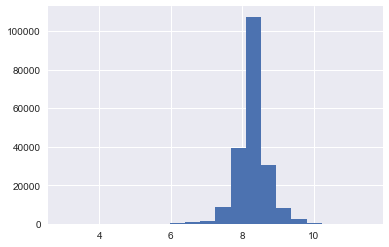

In [316]:
train['ORIGRATE'].hist(bins = 20)

### To remove the effect variance dominating, I will scale this numerical variable. (demean and scale to have standard deviation as 1) <br>It data looks like normal, I will use StandardScaler; otherwise Min-Max Normalization. <br> This feature looks quite normal.

In [317]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [318]:
numerical.add('ORIGRATE')

In [319]:
orig_rate_sc = StandardScaler()
train_pre['ORIGRATE'] = orig_rate_sc.fit_transform(train['ORIGRATE'].values.reshape(-1,1))
test_pre['ORIGRATE'] = orig_rate_sc.transform(test['ORIGRATE'].values.reshape(-1,1)) 
# Still use the standard scaler fitted by training data! Otherwise, it is not reasonable.

## ORIGUPB

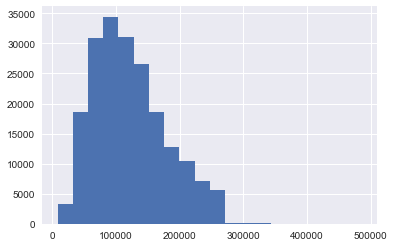

In [320]:
train['ORIGUPB'].hist(bins = 20)

### It is quite skewed so Min-Max

In [321]:
numerical.add('ORIGUPB')

In [322]:
upb_sc = MinMaxScaler()
train_pre['ORIGUPB'] = upb_sc.fit_transform(train['ORIGUPB'].values.reshape(-1,1))
test_pre['ORIGUPB'] = upb_sc.transform(test['ORIGUPB'].values.reshape(-1,1)) 

## ORIGTERM

### This feature is quite imbalanced. But I will include it because I think this is related to NMONTHS

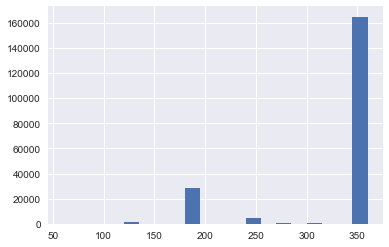

In [323]:
train['ORIGTERM'].hist(bins = 20)

In [324]:
numerical.add('ORIGTERM')

In [325]:
term_sc = MinMaxScaler()
train_pre['ORIGTERM'] = term_sc.fit_transform(train['ORIGTERM'].values.reshape(-1,1))
test_pre['ORIGTERM'] = term_sc.transform(test['ORIGTERM'].values.reshape(-1,1)) 

##  ORIGDATE and ORIGDATE_MO
I will not include these features because I think other features are more important.

In [326]:
set(train['ORIGDATE'])

{11999,
 12000,
 21999,
 22000,
 31999,
 32000,
 41999,
 42000,
 51999,
 52000,
 61999,
 62000,
 71999,
 81999,
 91999,
 101999,
 111999,
 121999}

In [327]:
set(train['ORIGDATE_MO'])

{-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5}

## FSTPAY
I chose not to include this feature (since most of loans have 20,000 difference between FSTPAY and ORIGDATE; although some have negative value (I did not understand why), the majority difference is 20,000)

In [328]:
set(train['FSTPAY'] - train['ORIGDATE'])

{-109999, -99999, -89999, 10000, 20000, 30000}

## LOANAGE
This feature is inbalanced and I did not fully understand why there was -1.... SO I will drop this.

In [329]:
train.value_counts('LOANAGE')

LOANAGE
 0     119178
 1      59299
-1       9207
 2       5780
 3       2404
 4       1236
 5        830
 6        607
 7        323
 8        272
 9        189
 10       186
 11       153
 12       122
 13        79
 14        74
 15        33
 16        28
dtype: int64

## REMMNTHS

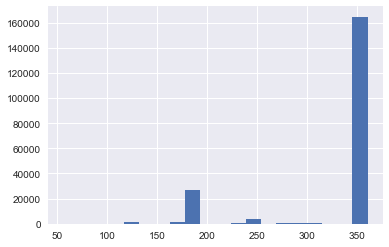

In [330]:
train['REMMNTHS'].hist(bins = 20)

In [331]:
numerical.add('REMMNTHS')

In [332]:
rm_sc = MinMaxScaler()
train_pre['REMMNTHS'] = rm_sc.fit_transform(train['REMMNTHS'].values.reshape(-1,1))
test_pre['REMMNTHS'] = rm_sc.transform(test['REMMNTHS'].values.reshape(-1,1))

## ADJRMTHS
This is close to REMMNTHS, to reduce model complexity and collinearity, I will drop this.

## MATDT (MATDT_MO will not be included since month is included in this feature)
For MATDT, I treat it as numerical: the larger the value, the longer the time to maturity.

In [333]:
pd.to_datetime(train['MATDT'],format = '%m%Y').head()

LID
946681740815   2030-04-01
921089628109   2015-05-01
738779422112   2015-04-01
615798070845   2030-04-01
345601060557   2030-04-01
Name: MATDT, dtype: datetime64[ns]

In [334]:
pd.to_datetime(train['MATDT'],format = '%m%Y').head().astype(np.int64)

LID
946681740815    1901232000000000000
921089628109    1430438400000000000
738779422112    1427846400000000000
615798070845    1901232000000000000
345601060557    1901232000000000000
Name: MATDT, dtype: int64

In [335]:
numerical.add('MATDT')

In [336]:
date_sc = MinMaxScaler()
train_pre['MATDT'] = date_sc.fit_transform(pd.to_datetime(train['MATDT'],format = '%m%Y').astype(np.int64).values.reshape(-1,1))
test_pre['MATDT'] = date_sc.fit_transform(pd.to_datetime(test['MATDT'],format = '%m%Y').astype(np.int64).values.reshape(-1,1))

## OLTV, OCLTV
This two features are highly correlated. I think including OCLTV is more reasonable than OLTV since the amount of combined loan is more related to the ability to pay or pre-pay. However, OCLTV has more than 20% missing value will OLTV has much more less so I will include OLTV <br>
This feature does not look like normal so Min-Max.

In [337]:
train[['OLTV','OCLTV']].isnull().sum()/train.shape[0]

OLTV     0.000005
OCLTV    0.209125
dtype: float64

In [338]:
numerical.add('OLTV')

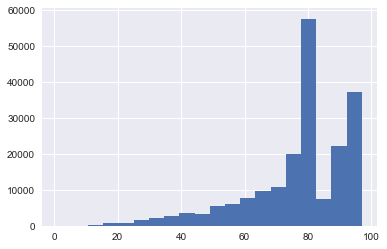

In [339]:
train['OLTV'].hist(bins = 20)

In [340]:
ratio_sc = MinMaxScaler()
train_pre['OLTV'] = ratio_sc.fit_transform(train['OLTV'].values.reshape(-1,1))
test_pre['OLTV'] = ratio_sc.transform(test['OLTV'].values.reshape(-1,1))

## NUMBO
A larger number is likely to have higher paying capibility

In [341]:
train.value_counts('NUMBO')

NUMBO
2.0     118301
1.0      79921
3.0       1316
4.0        348
6.0         12
5.0          7
8.0          4
7.0          4
10.0         1
dtype: int64

In [342]:
numerical.add('NUMBO')

In [343]:
nb_sc = MinMaxScaler()
train_pre['NUMBO'] = nb_sc.fit_transform(train['NUMBO'].values.reshape(-1,1))
test_pre['NUMBO'] = nb_sc.transform(test['NUMBO'].values.reshape(-1,1))

## DTI
This is a very important feature (I think!)

In [344]:
train['DTI']

LID
946681740815    19.0
921089628109    35.0
738779422112    42.0
615798070845    33.0
345601060557    21.0
                ... 
562335400010    35.0
151011432193    46.0
517753415065    53.0
948158851357    18.0
603343045348    59.0
Name: DTI, Length: 200000, dtype: float64

In [345]:
numerical.add('DTI')

In [346]:
dti_sc = MinMaxScaler()
train_pre['DTI'] = dti_sc.fit_transform(train['DTI'].values.reshape(-1,1))
test_pre['DTI'] = dti_sc.transform(test['DTI'].values.reshape(-1,1))

## CSCOREB, CSCOREC
CSCOREC has more missing values, so I will use CSCOREB

In [347]:
train[['CSCOREB', 'CSCOREC']].isnull().sum()

CSCOREB      3867
CSCOREC    104041
dtype: int64

In [348]:
numerical.add('CSCOREB')

In [349]:
score_sc = MinMaxScaler()
train_pre['CSCOREB'] = score_sc.fit_transform(train['CSCOREB'].values.reshape(-1,1))
test_pre['CSCOREB'] = score_sc.transform(test['CSCOREB'].values.reshape(-1,1))

## FIRSTFLAG
Although this feature is imbalance, I will include it for now and see the importance later.

In [350]:
train.value_counts('FIRSTFLAG')

FIRSTFLAG
N    163845
Y     36043
dtype: int64

In [351]:
categorical.add('FIRSTFLAG')

In [352]:
train_pre['FIRSTFLAG'] = pd.get_dummies(train['FIRSTFLAG'],drop_first=True)
test_pre['FIRSTFLAG'] = pd.get_dummies(test['FIRSTFLAG'],drop_first=True)

## PURPOSE
Purpose is important for finacing so I will include this.

In [353]:
train.value_counts('PURPOSE')

PURPOSE
P    144552
C     30356
R     25088
U         4
dtype: int64

### We should drop purpose U since only 4 examples and no example in test data

In [354]:
train = train[train['PURPOSE'] != 'U']
train_pre = train_pre.loc[train.index,:]

In [355]:
[categorical.add(i) for i in pd.get_dummies(train['PURPOSE'],prefix = 'PURPOSE',drop_first=True).columns]
train_pre = train_pre.join(pd.get_dummies(train['PURPOSE'],prefix = 'PURPOSE',drop_first=True))
test_pre = test_pre.join(pd.get_dummies(test['PURPOSE'], prefix = 'PURPOSE',drop_first=True)) # Do the same thing for testing data

## PROP

In [356]:
train.value_counts('PROP')

PROP
SF    169041
PU     14679
CO     13753
MH      1468
CP      1055
dtype: int64

In [357]:
[categorical.add(i) for i in pd.get_dummies(train['PROP'],prefix = 'PROP',drop_first=True).columns]
train_pre = train_pre.join(pd.get_dummies(train['PROP'],prefix = 'PROP',drop_first=True))
test_pre = test_pre.join(pd.get_dummies(test['PROP'], prefix = 'PROP',drop_first=True)) # Do the same thing for testing data

## NO_UNITS
I will treat this number as numerical even though only four values are given because I will the number (value) is probably indicative. If not important, I will exclude it later.

In [358]:
train.value_counts('NO_UNITS')

NO_UNITS
1    194557
2      4398
3       603
4       438
dtype: int64

In [359]:
numerical.add('NO_UNITS')

In [360]:
nn_sc = MinMaxScaler()
train_pre['NO_UNITS'] = nn_sc.fit_transform(train['NO_UNITS'].values.reshape(-1,1))
test_pre['NO_UNITS'] = nn_sc.transform(test['NO_UNITS'].values.reshape(-1,1))

## OCCSTAT
I will include this feature.

In [361]:
train.value_counts('OCCSTAT')

OCCSTAT
P    183530
I      8975
S      7491
dtype: int64

In [362]:
[categorical.add(i) for i in pd.get_dummies(train['OCCSTAT'],prefix = 'OCCSTAT',drop_first=True).columns]
train_pre = train_pre.join(pd.get_dummies(train['OCCSTAT'],prefix = 'OCCSTAT',drop_first=True))
test_pre = test_pre.join(pd.get_dummies(test['OCCSTAT'], prefix = 'OCCSTAT',drop_first=True)) # Do the same thing for testing data

## Geographical: MSA and ZIP
I will not include them since they are categorical and their dimension is large (increase model complexity and decrease computational speed significantly). If treat them as numerical, it is not reasonable because magnitude does not matter. 

In [363]:
train.value_counts('MSA')

MSA
0        22240
35620     9039
16980     7638
33100     6101
31100     5559
         ...  
49500        6
14100        5
15680        5
47460        4
21420        2
Length: 406, dtype: int64

## IO
I will drop this feature because of too many missing values.

In [364]:
train['IO']

LID
946681740815    NaN
921089628109    NaN
738779422112    NaN
615798070845    NaN
345601060557    NaN
               ... 
562335400010    NaN
151011432193    NaN
517753415065    NaN
948158851357    NaN
603343045348    NaN
Name: IO, Length: 199996, dtype: object

## DLQSTATUS
This feature is very imbalanced so I will not include it.

In [365]:
train.value_counts('DLQSTATUS')

DLQSTATUS
0    199689
1       301
2         4
4         1
3         1
dtype: int64

## MODFLAG
This feature makes no difference so I will not include it.

In [366]:
train.value_counts('MODFLAG')

MODFLAG
N    199996
dtype: int64

## MITYPE
It has many missing values so I will drop it.

In [367]:
train['MITYPE'].isnull().sum()

132543

## RELMORTGIND
This feature is very imbalanced so I will not use it.

In [368]:
train.value_counts('RELMORTGIND')

RELMORTGIND
N    198702
Y      1294
dtype: int64

## ACTPER_MO
I will not include this feature because I think it is less relevant.

## Adding variables that need to predict

In [369]:
train_pre['regression'] = train['NMONTHS']
train_pre['classfication'] = train['FORCLOSED']

## Missing Values
Since the numbers of missing values of my pre-selected features are not high, I use training data mean to fill both training and testing's missing rows for those features.

In [370]:
train_pre.isnull().sum()

CHNL_C                                                 0
CHNL_R                                                 0
SELLER_Bank Of America, N.A.                           0
SELLER_Bishops Gate Residential Mortgage Trust         0
SELLER_Citimortgage, Inc.                              0
SELLER_Downey Savings And Loan Association, F.A.       0
SELLER_First Tennessee Bank National Association       0
SELLER_Flagstar Bank, Fsb                              0
SELLER_Gmac Mortgage, Llc                              0
SELLER_Harwood Street Funding I, Llc                   0
SELLER_Netbank Funding Services                        0
SELLER_Old Kent Mortgage Company                       0
SELLER_Other                                           0
SELLER_Pnc Bank, N.A.                                  0
SELLER_Rbc Mortgage Company                            0
SELLER_Regions Bank                                    0
SELLER_Suntrust Mortgage Inc.                          0
SELLER_The Huntington National 

In [371]:
train_pre['OLTV'].fillna(value = train_pre['OLTV'].dropna().mean(),inplace = True)
test_pre['OLTV'].fillna(value = train_pre['OLTV'].dropna().mean(),inplace = True)

In [372]:
train_pre['NUMBO'].fillna(value = train_pre['NUMBO'].dropna().mean(),inplace = True)
test_pre['NUMBO'].fillna(value = train_pre['NUMBO'].dropna().mean(),inplace = True)

In [373]:
train_pre['DTI'].fillna(value = train_pre['DTI'].dropna().mean(),inplace = True)
test_pre['DTI'].fillna(value = train_pre['DTI'].dropna().mean(),inplace = True)

In [374]:
train_pre['CSCOREB'].fillna(value = train_pre['DTI'].dropna().mean(),inplace = True)
test_pre['CSCOREB'].fillna(value = train_pre['DTI'].dropna().mean(),inplace = True)

# NMONTHS

I commented codes for cross_validation because it is gonna take "forever" to run. I create a regressor with best parameters for each for you to evaluate!

## Models
- Linear Regression
- LASSO (I will only use LASSO here because I want to see whether some coefficients will be pushed to 0; Ridge not included)
- SVM
- Random Forests
- Best predictor (among the above four models) with PCA (to see whether PCA will improve the model further)

### Summary List
This list is created for saving model result and for later comparison.

In [174]:
Reg_Models = [] #Model Name
Reg_Models_Params = [] #Model's best parameters by cross-validation
Reg_Models_MAE = [] #Mean Absolute Error by the model with best parameters

In [83]:
from sklearn.metrics import SCORERS

In [84]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## Linear Regression as a Benchmark
I used GridSearch function to do cross-validation (with ***KFold = 5***) for all the models. The best parameters of each model is selected by ***Minimizing Mean Absolute Error (Maximizing Negative Mean Absolute Error)***. 

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,KFold

In [86]:
k_fold = KFold(n_splits=5,shuffle=True, random_state = 0)

### For Linear Regression, I only tuned "fit_intercept".

In [407]:
lr_grid = GridSearchCV(LinearRegression(),param_grid=dict(fit_intercept = [True,False]),cv = k_fold,\
                       scoring = 'neg_mean_absolute_error')

In [408]:
lr_grid_result = lr_grid.fit(X = train_pre[[*categorical,*numerical]], y = train_pre['regression'])

In [409]:
print("Best: %f using %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))
means = lr_grid_result.cv_results_['mean_test_score']
stds = lr_grid_result.cv_results_['std_test_score']
params = lr_grid_result.cv_results_['params']

Best: -15.477869 using {'fit_intercept': True}


### With 5 folds, the best parameter is with intercept for linear regression. It has 15.489416 mean absolute error on average.

In [175]:
Reg_Models.append('Linear Regression')
Reg_Models_Params.append(lr_grid_result.best_params_)
Reg_Models_MAE.append(-lr_grid_result.best_score_)

## LASSO
LASSO will possibly force some coefficients of features to be zero. For LASSO, I will tune the parameter ***alpha*** which is the regularization scaler and also ***fit_intercept***. <br>
I have commented out the codes for cross_validation. It ran more than 10 minutes for 5 folds and parameters to be tuned.

In [91]:
from sklearn.linear_model import Lasso

In [92]:
"""lasso_param = dict(fit_intercept = [True,False],alpha = np.linspace(0,4, num = 20)[1:])
lasso_grid = GridSearchCV(Lasso(),param_grid=lasso_param,cv = k_fold,\
                       scoring = 'neg_mean_absolute_error', n_jobs=-1)"""

"lasso_param = dict(fit_intercept = [True,False],alpha = np.linspace(0,4, num = 20)[1:])\nlasso_grid = GridSearchCV(Lasso(),param_grid=lasso_param,cv = k_fold,                       scoring = 'neg_mean_absolute_error', n_jobs=-1)"

In [93]:
#lasso_grid_result = lasso_grid.fit(X = train_pre[[*categorical,*numerical]], y = train_pre['regression'])

In [95]:
"""print("Best: %f using %s" % (lasso_grid_result.best_score_, lasso_grid_result.best_params_))
means = lasso_grid_result.cv_results_['mean_test_score']
stds = lasso_grid_result.cv_results_['std_test_score']
params = lasso_grid_result.cv_results_['params']"""

Best: -15.410824 using {'alpha': 0.21052631578947367, 'fit_intercept': True}


In [96]:
"""Reg_Models.append('LASSO')
Reg_Models_Params.append(lasso_grid_result.best_params_)
Reg_Models_MAE.append(-lasso_grid_result.best_score_)"""

### Lasso with alpha = 0.21052631578947367 and fit_intercept = True are the best parameters.

In [93]:
lasso_best = Lasso(alpha = 0.21052631578947367, fit_intercept=True, random_state = 0)

In [94]:
lasso_best_res = lasso_best.fit(X = train_pre[[*categorical,*numerical]], y = train_pre['regression'])

In [95]:
lasso_best_res.coef_

array([ -0.        ,  -0.        ,  -0.7032901 ,  -2.63909158,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.43529115,   0.        ,  -3.20123538,
        -0.        ,  -0.        , -52.68856162,  -0.        ,
        -0.90904023,  -3.57345131,   0.        ,   0.        ,
        -0.        , -10.72818526])

### LASSO forced many coefficients to be 0!!!! Indeed, categorical variables are dependent.

In [96]:
train_pre[[*categorical,*numerical]].columns[lasso_best_res.coef_ == 0]

Index(['PROP_PU', 'PROP_SF', 'CHNL_R', 'PURPOSE_R', 'OCCSTAT_S', 'PURPOSE_U',
       'PROP_CP', 'PROP_MH', 'REMMNTHS', 'ORIGTERM', 'DTI', 'OLTV', 'NO_UNITS',
       'NUMBO'],
      dtype='object')

In [97]:
train_pre[[*categorical,*numerical]].columns[lasso_best_res.coef_ != 0]

Index(['CHNL_C', 'OCCSTAT_P', 'FIRSTFLAG', 'PURPOSE_P', 'ORIGUPB', 'MATDT',
       'ORIGRATE', 'CSCOREB'],
      dtype='object')

## Support Vector Machine
For Support Vector Machine Regression, I will tune parameters: C, gamma, and kernel.

In [98]:
from sklearn.svm import SVR

In [99]:
Cs = [0.01, 0.05, 0.1 ,0.5, 1, 5]
gammas = [0.01, 0.05, 0.1, 0.5 ,1]
kernels = ['linear','rbf']

In [100]:
svr_param = dict(kernel = kernels, C = Cs, gamma = gammas)
svr_grid = GridSearchCV(SVR(),param_grid=svr_param,cv = k_fold,\
                       scoring = 'neg_mean_absolute_error', n_jobs=-1)

In [102]:
#svr_grid_result = svr_grid.fit(X = train_pre[[*categorical,*numerical]], y = train_pre['regression'])

In [103]:
"""print("Best: %f using %s" % (svr_grid_result.best_score_, svr_grid_result.best_params_))
means = svr_grid_result.cv_results_['mean_test_score']
stds = svr_grid_result.cv_results_['std_test_score']
params = svr_grid_result.cv_results_['params']"""

'print("Best: %f using %s" % (svr_grid_result.best_score_, svr_grid_result.best_params_))\nmeans = svr_grid_result.cv_results_[\'mean_test_score\']\nstds = svr_grid_result.cv_results_[\'std_test_score\']\nparams = svr_grid_result.cv_results_[\'params\']'

### SVM took me a night to run (because SVM is sensitive to the size of data; the result was not good: score was 15.450284 which is worse than LASSO) . In addition, to fit data with the best parameter even took a lot of time so I just kept SVM here to show this part was implemented.

In [105]:
from sklearn.ensemble import RandomForestRegressor

## Random Forests
For Random Forests, I tuned no of trees, no of max_features, no of min_samples_leaf and no of min_samples_split

In [104]:
rf_n_trees = [20,30,50,100]
rf_max_features = ['auto',3,5,8,16]
rf_min_samples_leaf =  [2, 5, 10,20,30]
rf_min_samples_split = [10,20,50,60,100]

In [166]:
rf_param = dict(n_estimators = rf_n_trees,max_features = rf_max_features,min_samples_split = rf_min_samples_split,
                  min_samples_leaf = rf_min_samples_leaf )
rf_grid = GridSearchCV(RandomForestRegressor(random_state = 0), rf_param, cv = k_fold,
                       scoring = 'neg_mean_absolute_error',n_jobs=-1)

In [167]:
#rf_grid_result = rf_grid.fit(X = train_pre[[*categorical,*numerical,*tree_specific]], y = train_pre['regression'])

In [168]:
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))
means = rf_grid_result.cv_results_['mean_test_score']
stds = rf_grid_result.cv_results_['std_test_score']
params = rf_grid_result.cv_results_['params']

Best: -15.043267 using {'max_features': 'auto', 'min_samples_leaf': 30, 'min_samples_split': 50, 'n_estimators': 20}


In [178]:
Reg_Models.append('Random Forest')
Reg_Models_Params.append(rf_grid_result.cv_results_['params'])
Reg_Models_MAE.append(-rf_grid_result.cv_results_['mean_test_score'])

### Random Forests with {max_features': 'auto', 'min_samples_leaf': 30, 'min_samples_split': 50, 'n_estimators': 20} is the best in cross validation achieving Mean Absolute Error as 15.043267.

In [376]:
rf_best = RandomForestRegressor(n_estimators = 20, max_features = 'auto', min_samples_leaf = 30,\
                                min_samples_split= 50, random_state = 0)

In [377]:
rf_best_res = rf_best.fit(X = train_pre[[*categorical,*numerical,*tree_specific]], y = train_pre['regression'])

In [378]:
feature_importances = pd.DataFrame(data = rf_best_res.feature_importances_, index = [*categorical,*numerical,*tree_specific])

### The feature importance shows us ORIGUPB, ORIGRATE, CSCOREB, OLTV, and DTI were the top five features while sellers (around 20 of them) show almost 0 importance.

In [189]:
feature_importances.sort_values(0,ascending=False)

,0
ORIGUPB,0.460828
ORIGRATE,0.156253
CSCOREB,0.117025
OLTV,0.062068
DTI,0.060297
MATDT,0.028627
REMMNTHS,0.019141
PURPOSE_P,0.013444
NUMBO,0.011476
CHNL_R,0.008797


## PCA
This function finds number of principal component needed for explaining over 95% variance and return the PCA model<br>
PCA is only applied to ***numerical*** features.

In [190]:
from sklearn.decomposition import PCA

In [191]:
def fit_pca(data,threshold, solver):
    
    pca = PCA(svd_solver = solver)
    pca_model =pca.fit(data)
    variance = pca_model.explained_variance_ratio_.cumsum()
    
    number_of_factor = 0
    for i,j in enumerate(variance):
        if j>= threshold:
            number_of_factor = i
            break
    print('We need {} principal factors to caputure {} percent of variance.'.format(number_of_factor,threshold*100))
    new_pca = PCA(n_components = number_of_factor,svd_solver = solver)
    new_pca_model = new_pca.fit(data)
    
    
    return number_of_factor,new_pca_model

In [192]:
no_of_factor, pca = fit_pca(train_pre[numerical],95/100, solver = 'full')

We need 2 principal factors to caputure 95.0 percent of variance.


In [193]:
train_pre[['PCA1','PCA2']] = pca.fit_transform(train_pre[numerical])

### Random Forest was the best model among all the models tested above. Let's apply Random Forest with PCA to see whether we can further improve the model (also the top eight features are tested for comparison, i.e., model with only top seven features (top seven explained over 90% importance)) <br>Since I tested a lot of models, for PCA part, I did not tune parameters (due to limited time). I only use the best parameter.

In [194]:
rf_pca_param = dict(n_estimators = [20],max_features = ['auto'],min_samples_split = [50],
                  min_samples_leaf = [30] )
rf_pca_grid = GridSearchCV(RandomForestRegressor(random_state = 0), param_grid=rf_pca_param, cv = k_fold,\
                           scoring = 'neg_mean_absolute_error',n_jobs=-1)

In [195]:
rf_pca_grid_res = rf_pca_grid.fit(train_pre[[*categorical,*['PCA1','PCA2'],*tree_specific]], y = train_pre['regression'] )

In [386]:
rf_pca_grid_res.cv_results_['mean_test_score']

array([-15.18068838])

### However, the result was not improved using PCA (because I did not tune hyperparameters).<br>Let's use the top seven importance features.

In [203]:
feature_importances.sort_values(0,ascending=False).head(7).cumsum()

,0
ORIGUPB,0.460828
ORIGRATE,0.617081
CSCOREB,0.734107
OLTV,0.796174
DTI,0.856471
MATDT,0.885098
REMMNTHS,0.904240


In [202]:
rf_7_param = dict(n_estimators = [20],max_features = ['auto'],min_samples_split = [50],
                  min_samples_leaf = [30] )
rf_7_grid = GridSearchCV(RandomForestRegressor(random_state = 0), param_grid=rf_pca_param, cv = k_fold,\
                           scoring = 'neg_mean_absolute_error',n_jobs=-1)

In [204]:
rf_7_grid_res = rf_pca_grid.fit(train_pre[feature_importances.sort_values(0,ascending=False).head(7).index],\
                                y = train_pre['regression'])

In [385]:
rf_7_grid_res.cv_results_['mean_test_score'] # No better than the orginal Random Forest

array([-15.18068838])

In [211]:
Regression_Result = pd.DataFrame(dict(Model = Reg_Models, Parameters = Reg_Models_Params, Mean_Absolute_Error = Reg_Models_MAE))

# Summary
In my cross_validation, Random Forest was the best predictor giving us Mean_Absolute_Error as around 15.04 (which is not expected, to be honest)

In [212]:
Regression_Result

,Model,Parameters,Mean_Absolute_Error
0,Linear Regression,{'fit_intercept': True},15.478
1,LASSO,"{'alpha': 0.21052631578947367, 'fit_intercept'...",15.4108
2,SVM,"{'kernel': 'rbf', 'C': 0.5, 'Gamma': 0.5}",15.4503
3,Random Forest,"[{'max_features': 'auto', 'min_samples_leaf': ...",[15.043267443492686]


# Save Predictions

In [382]:
prediction = pd.DataFrame(index = test_pre.index)

In [383]:
prediction['NMONTHS'] = rf_best_res.predict(test_pre[[*categorical,*numerical,*tree_specific]])

In [426]:
prediction.to_csv('Regression_Predictions.csv')

Saving data for classification problem because I use separate notebooks.

In [421]:
train_pre.to_csv('my_train.csv')
test_pre.to_csv('my_test.csv')

# Improvement
The model can be trained better if filtering outliers for "NMONTHS". On avergae, the number is around 28 (random forest's insample prediction is also 28). However, the max of no of month is 242 in the sample but random forest's insample prediction's max is only 141. That makes sense why Random Forest was the best model because it is robust to outliers.

In [399]:
train_pre['regression'].mean()

28.07204644092882

In [418]:
train_pre['regression'].max()

242

In [400]:
rf_best_res.predict(train_pre[[*categorical,*numerical,*tree_specific]]).mean()

28.09902556070258

In [419]:
rf_best_res.predict(train_pre[[*categorical,*numerical,*tree_specific]]).max()

141.01788168777725